In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Visiualization

In [49]:
"""
1. Data Import
2. Basic Statistic Summary
3. Numerical features exploration
4. Categorical features exploration
5. Missing Data Visualization
"""

'\n1. Data Import\n2. Basic Statistic Summary\n3. Numerical features exploration\n4. Categorical features exploration\n5. Missing Data Visualization\n'

In [50]:
# reading the dataset
data = pd.read_csv('./dataset.csv')
# checking the shape of the data
data.shape

(12330, 19)

In [51]:
# Summarize numerial features
data[data.columns[:9]].describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
count,12330.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,6164.500000,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003
std,3559.508744,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,3082.250000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286
50%,6164.500000,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124
75%,9246.750000,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000
max,12329.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000


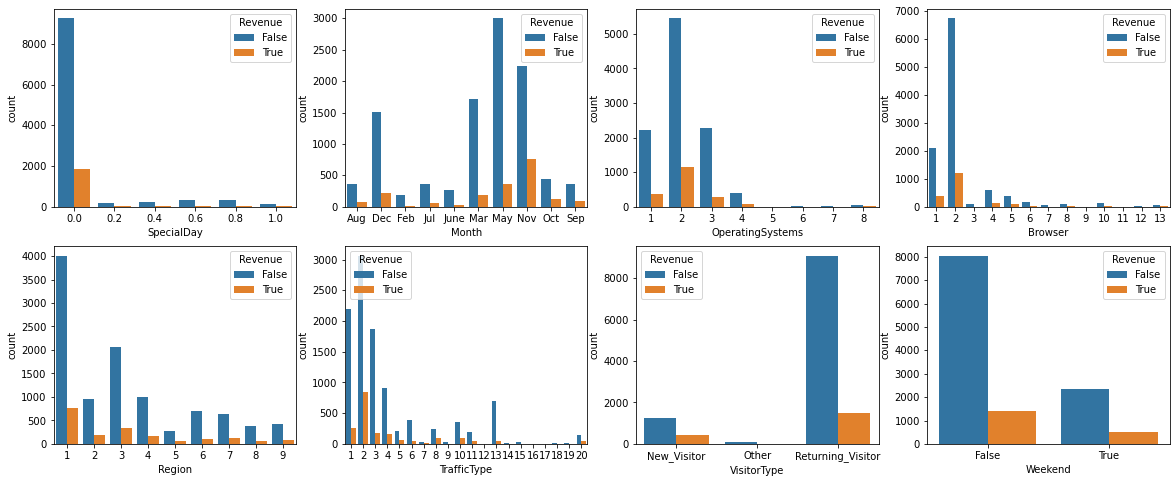

In [52]:
# Summarize categorical features
cat_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for idx, cat in enumerate(cat_features):
    stat_by_cat = data.groupby(by = [cat,'Revenue']).agg(count =('Revenue', 'count')).reset_index()
    sns.barplot(ax = axes[idx//4, idx % 4], x = cat, y = 'count', hue='Revenue', data=stat_by_cat)

C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Revenue')

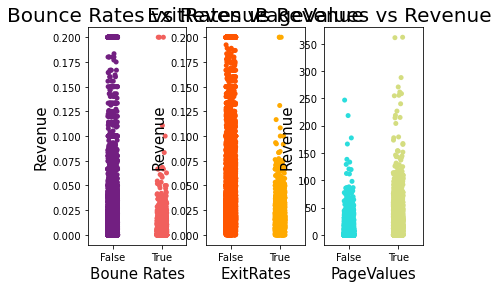

In [53]:
# Quantitative measures VS target

# bounce rates vs revenue
plt.subplot(1, 3, 1)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Exit rates vs revenue
plt.subplot(1, 3, 2)
sns.stripplot(data['Revenue'], data['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Page values vs revenue
plt.subplot(1, 3, 3)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'rainbow')
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

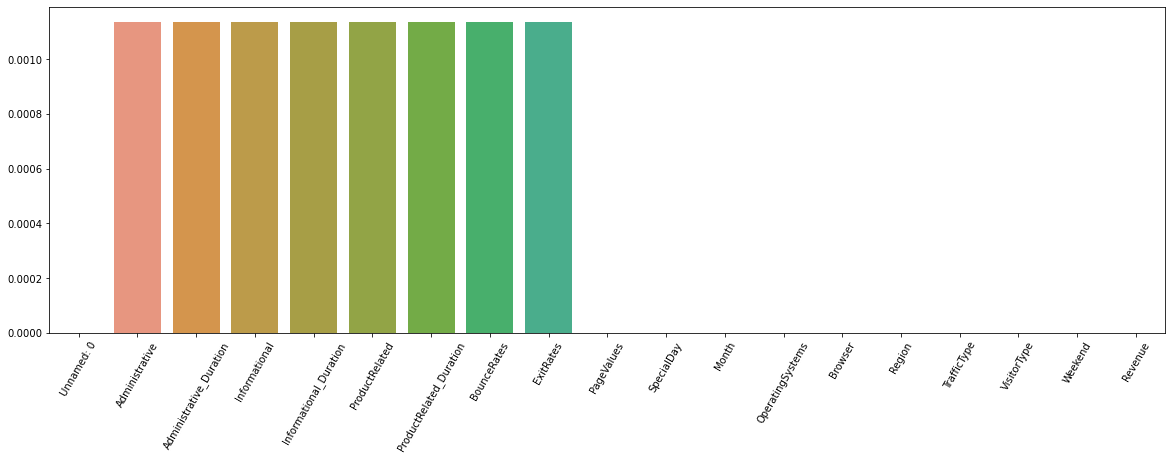

In [54]:
# Plot the percentages of missing data
data_missing_perc = data.isnull().sum()/data.shape[0]
fit = plt.figure(figsize = (20,6))
ax = sns.barplot(x = data_missing_perc.index, y = data_missing_perc.values)
ax.tick_params(axis = 'x', rotation=60)

# 2. Data Cleaning

In [55]:
"""
1. Missing Data (Impute / delete)
2. Standardize?
3. Outliers?
4. Data Split
"""

'\n1. Missing Data (Impute / delete)\n2. Standardize?\n3. Outliers?\n4. Data Split\n'

In [56]:
# Missing Data
data.isna().sum()

Unnamed: 0                  0
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [57]:
# Impute the missing values with mean
# Since the percentage of missing values is low, we impute the missing values with mean.
from sklearn.impute import SimpleImputer

columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates']
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in columns:
    imputed_col = imp_mean.fit_transform(np.array(data[col]).reshape(-1,1))
    data.drop([col], axis=1)
    data[col] = imputed_col
    
# To confirm no missing values left (i.e., sum should be 0)
data.isna().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [58]:
# Split dataset into development and test datasets.

print(data['Revenue'].value_counts()/len(data))

# Since the dataset is imbalanced, we use stratified dataset split.
from sklearn.model_selection import train_test_split

y = data['Revenue']
X = data.drop(['Revenue'], axis=1)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) 

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [59]:
y_dev.value_counts()/len(y_dev)

False    0.845296
True     0.154704
Name: Revenue, dtype: float64

In [60]:
y_test.value_counts()/len(y_test)

False    0.845093
True     0.154907
Name: Revenue, dtype: float64

In [61]:
# Apply Standard Scaling to numerical features
X_dev_num = X_dev[X_dev.columns[:9]]
X_test_num = X_test[X_dev.columns[:9]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_dev_num_scaled = ss.fit_transform(X_dev_num)
X_test_num_scaled = ss.transform(X_test_num)

X_dev_scaled = pd.concat([pd.DataFrame(X_dev_num_scaled, columns=X_dev_num.columns), X_dev[X_dev.columns[9:]]], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns), X_test[X_dev.columns[9:]]], axis=1)

In [62]:
print(X_dev_scaled.shape)
print(X_test_scaled.shape)

(11844, 18)
(4456, 18)


In [63]:
X_dev_scaled[X_dev_scaled.columns[:9]].describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
count,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03
mean,-2.006820e-17,-3.497248e-16,-2.718718e-16,1.848109e-15,-1.710862e-16,2.687203e-19,9.328395e-17,-1.413666e-17,-1.057998e-18
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.730587e+00,-6.995790e-01,-4.739634e-01,-3.915552e-01,-2.514931e-01,-7.083911e-01,-6.422069e-01,-4.597165e-01,-8.826000e-01
25%,-8.690905e-01,-6.995790e-01,-4.680741e-01,-3.915552e-01,-2.443484e-01,-5.525700e-01,-5.430344e-01,-4.597165e-01,-5.900365e-01
50%,2.692650e-04,-3.992041e-01,-4.209601e-01,-3.915552e-01,-2.443484e-01,-3.077082e-01,-3.200680e-01,-3.946512e-01,-3.637178e-01
75%,8.665399e-01,5.019205e-01,7.749143e-02,-3.915552e-01,-2.443484e-01,1.374951e-01,1.487357e-01,-1.091264e-01,1.413720e-01
max,1.731406e+00,7.410543e+00,1.518154e+01,1.822921e+01,1.588062e+01,1.498502e+01,2.255719e+01,3.630501e+00,3.213288e+00


In [64]:
X_test_scaled[X_test_scaled.columns[:9]].describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,0.001346,-0.016853,0.042014,-0.002679,0.010946,-0.006609,0.005215,-0.033372,-0.009660
std,0.997968,0.987343,1.190362,0.924312,1.027574,0.947866,1.133764,0.947546,0.965716
min,-1.730868,-0.699579,-0.473963,-0.391555,-0.251493,-0.708391,-0.642207,-0.459716,-0.882600
25%,-0.851960,-0.699579,-0.468074,-0.391555,-0.244348,-0.552570,-0.534868,-0.459716,-0.590037
50%,0.000410,-0.399204,-0.426849,-0.391555,-0.244348,-0.307708,-0.314159,-0.401117,-0.370614
75%,0.861204,0.201546,0.094202,-0.391555,-0.244348,0.137495,0.132823,-0.118865,0.141372
max,1.725509,6.509418,19.548020,8.918827,17.970148,11.178536,33.735680,3.630501,3.213288


Outliers are left intact because depending on the model we train, outliers may not negatively impact the results.

# 3. Model Training

In [65]:
"""
1. Hyperparameter Tuning
2. Model Selection
3. etc.,
"""

'\n1. Hyperparameter Tuning\n2. Model Selection\n3. etc.,\n'

In [ ]:
# The following are the preprocessed data
X_dev_scaled
y_dev
X_test_scaled
y_test